# Visualização dos dados multiespectrais

In [1]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import os
import random

import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import concurrent.futures

from osgeo import gdal
import rasterio # the GEOS-based raster package
from rasterio import plot as rioplot
import numpy # the array computation library
import geopandas # the GEOS-based vector package
from libtiff import TIFF
from cv2 import *

In [2]:
%matplotlib inline

In [3]:
SAMPLE_INSTANCE = "c160418tscrfl_nfung_64"
FOLDER_SAMPLE =  "RAW/crop_tsc_2016_b2s"

In [4]:
def print_histogram(im):
    plt.hist(im, bins='auto')  
    plt.title("Histogram")
    plt.show()
    plt.close()

In [5]:
def remove_less_than_zero(mat):
    mat[mat < 0] = np.NaN
    mat[np.isnan(mat)] = 0
    return mat

## LibTIFF

Opening band B1
(41, 53)


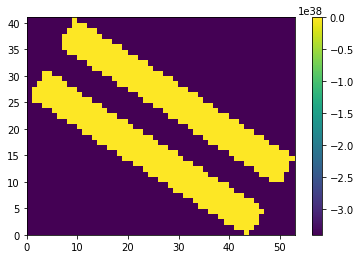

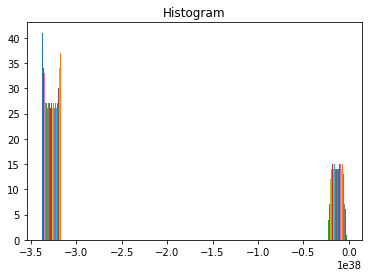

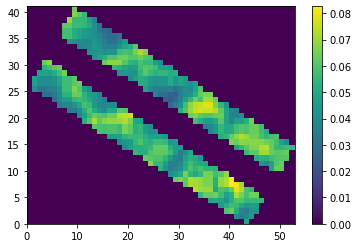

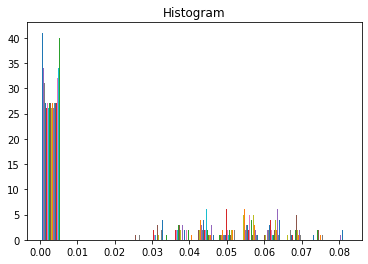

Opening band B2
(41, 53)


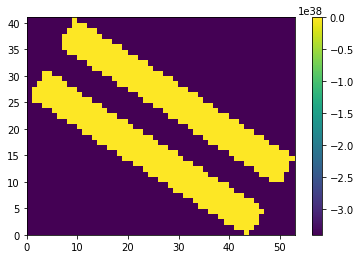

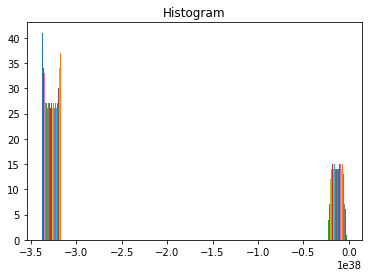

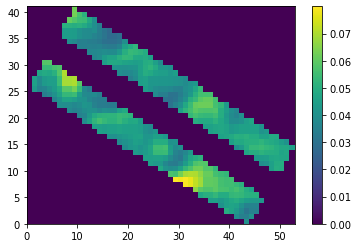

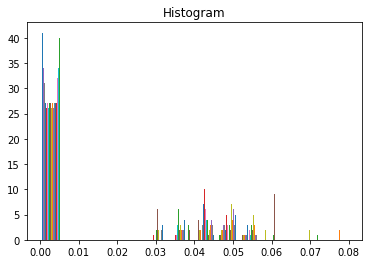

Opening band B3
(41, 53)


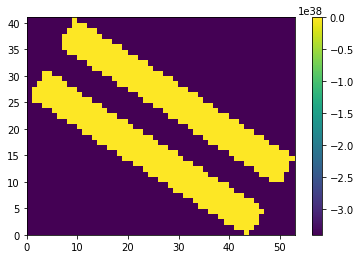

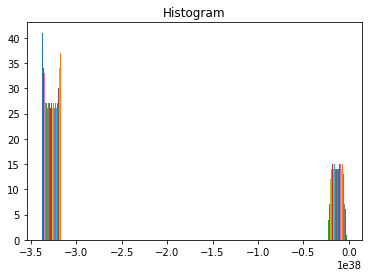

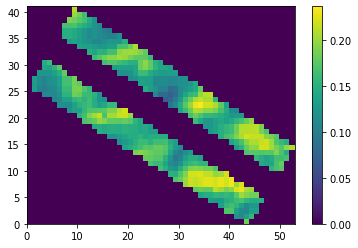

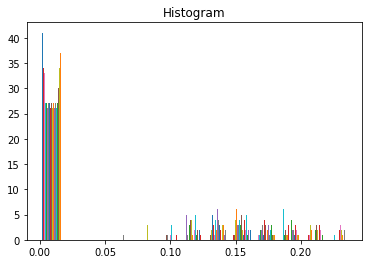

Opening band B4
(41, 53)


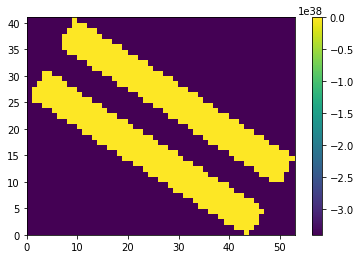

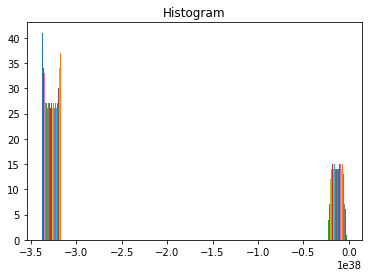

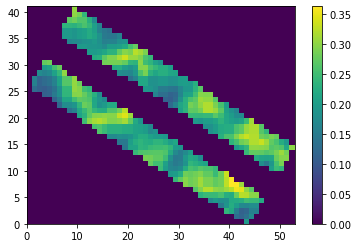

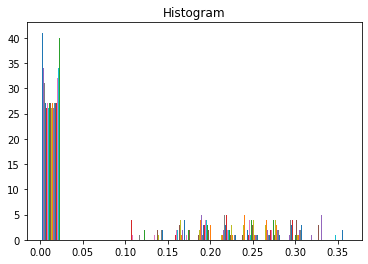

In [6]:
def open_with_libtiff():
    for band in ['B1', 'B2', 'B3', 'B4']:
        print('Opening band', band)
        image = TIFF.open(os.path.join('data', FOLDER_SAMPLE, 
                                       SAMPLE_INSTANCE + '_' + band
                                       + '.tif'))
        image = image.read_image()
        print(image.shape)
        plt.pcolormesh(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
        
        image = remove_less_than_zero(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
        
open_with_libtiff()

## OpenCV

Opening band B1
(41, 53)


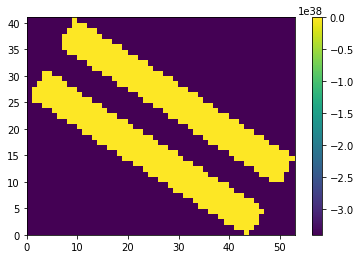

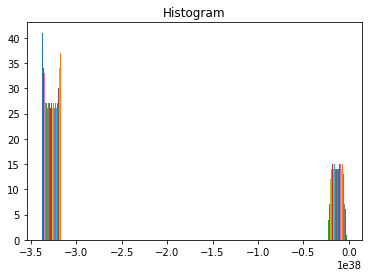

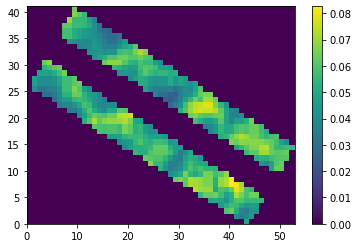

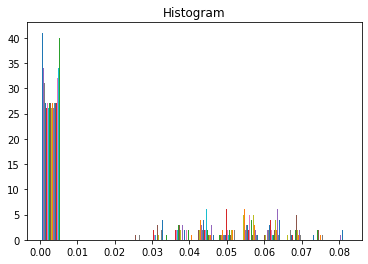

Opening band B2
(41, 53)


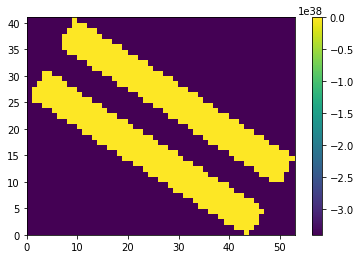

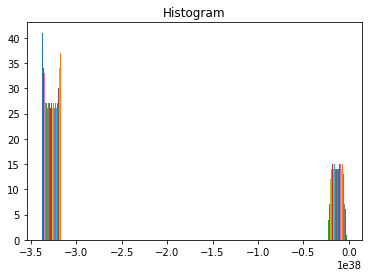

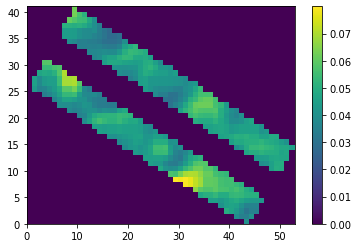

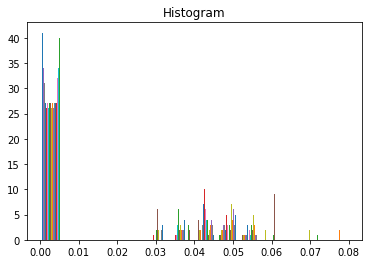

Opening band B3
(41, 53)


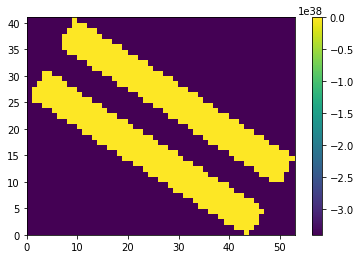

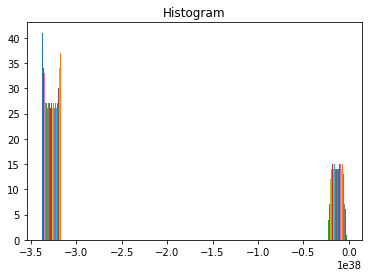

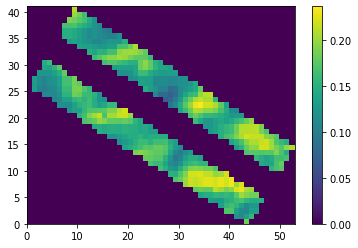

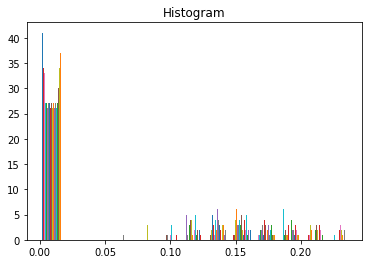

Opening band B4
(41, 53)


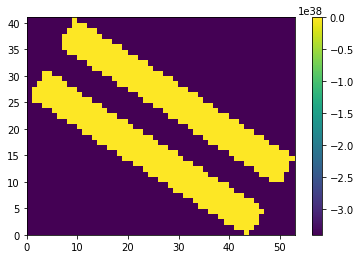

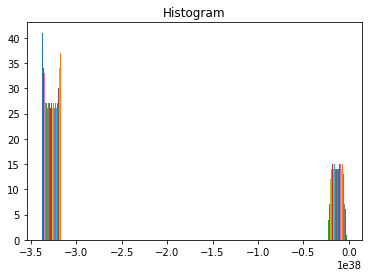

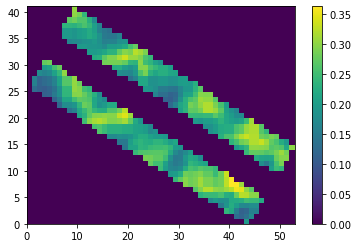

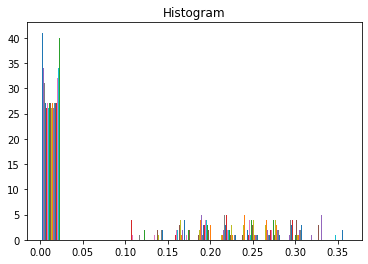

In [7]:
def open_with_opencv():
    for band in ['B1', 'B2', 'B3', 'B4']:
        print('Opening band', band)
        path =os.path.join('data', FOLDER_SAMPLE, SAMPLE_INSTANCE + '_' + band
                           + '.tif')
        image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        print(image.shape)
        plt.pcolormesh(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
        
        image = remove_less_than_zero(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
open_with_opencv()

## Matplotlib

O Matplotlib parece estar tentando abrir a imagem como se houvessem vários canais de cor.

In [8]:
def open_with_matplot():
    for band in ['B1', 'B2', 'B3', 'B4']:
        print('Opening band', band)
        path = os.path.join('data', FOLDER_SAMPLE, 
                            SAMPLE_INSTANCE + '_' + band + '.tif')
        image = matplotlib.image.imread(path)
        print(image.shape)
        image = np.dsplit(image, image.shape[-1])
        for i, ch in enumerate(image):
            print(ch.shape)
            ch = ch[:, :, 0]
            plt.pcolormesh(ch)
            plt.show()
            plt.close()
            print_histogram(ch)

            image = remove_less_than_zero(ch)
            plt.pcolormesh(ch)
            plt.show()
            plt.close()
            print_histogram(ch)
# open_with_matplot()

## Gdal

Opening band B1
1


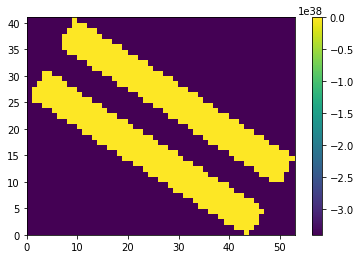

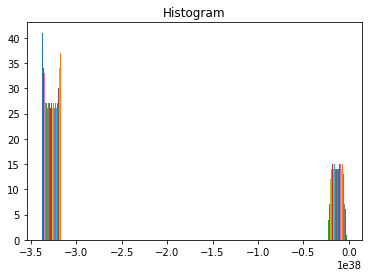

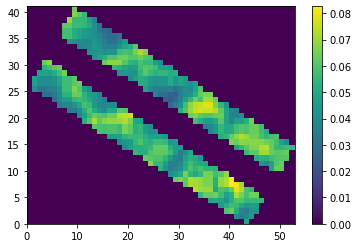

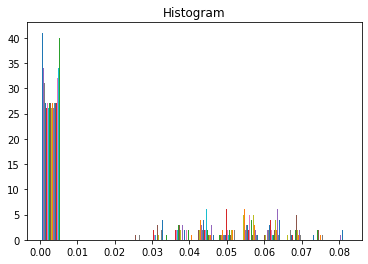

Opening band B2
1


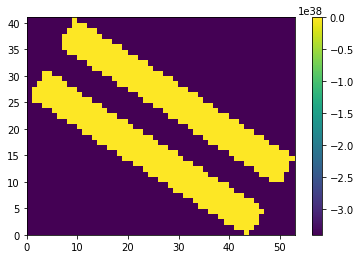

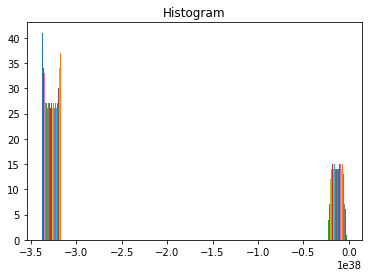

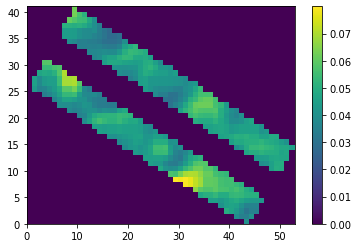

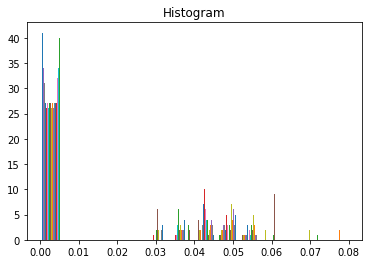

Opening band B3
1


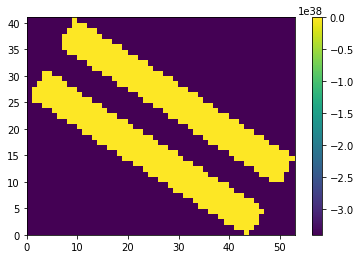

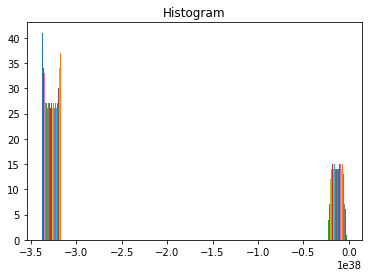

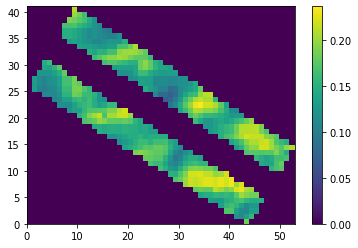

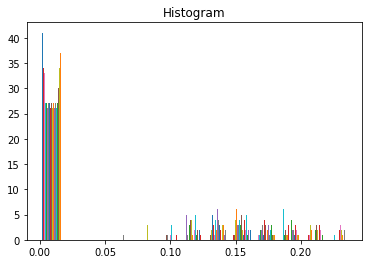

Opening band B4
1


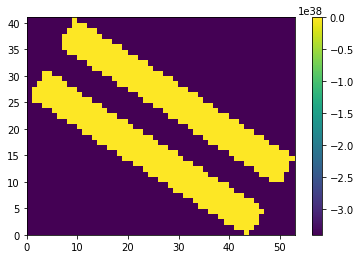

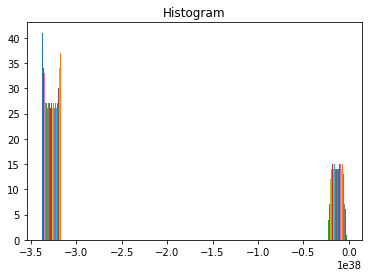

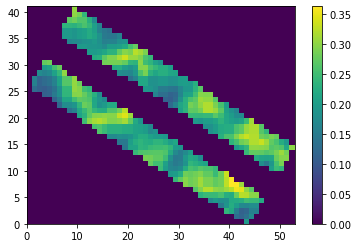

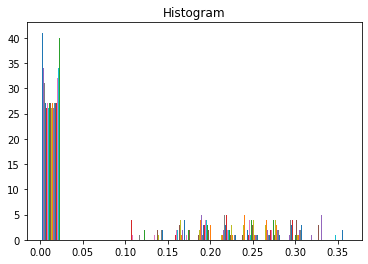

In [9]:
def open_with_gdal():
    for band in ['B1', 'B2', 'B3', 'B4']:
        print('Opening band', band)
        image = gdal.Open(os.path.join('data', FOLDER_SAMPLE, 
                                       SAMPLE_INSTANCE + '_' + band
                                       + '.tif'), 
                          gdal.GA_ReadOnly)
        print(image.RasterCount)
        
        for x in range(1, image.RasterCount + 1):
            band = image.GetRasterBand(x)
            array = band.ReadAsArray()
            plt.pcolormesh(array)
            plt.colorbar()
            plt.show()
            plt.close()
            print_histogram(array)

            image = remove_less_than_zero(array)
            plt.pcolormesh(array)
            plt.colorbar()
            plt.show()
            plt.close()
            print_histogram(array)
        
open_with_gdal()

## Rasterio

Opening band B1
(41, 53)


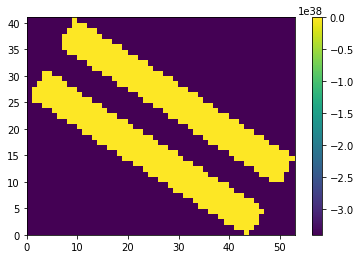

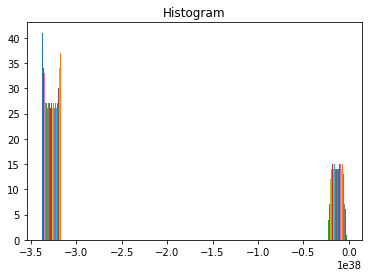

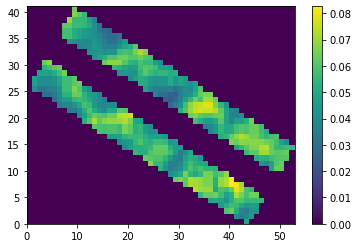

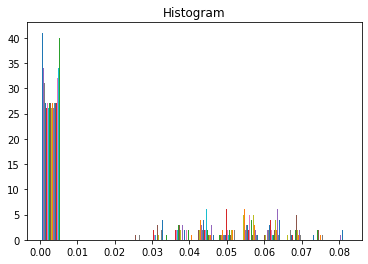

Opening band B2
(41, 53)


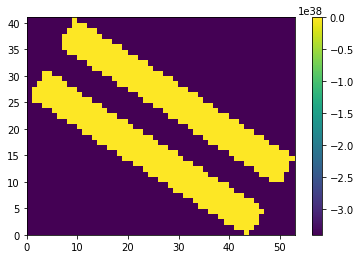

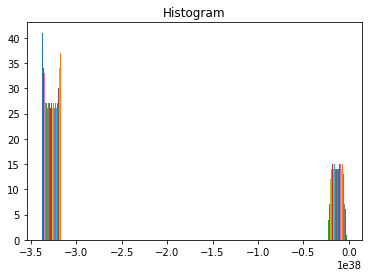

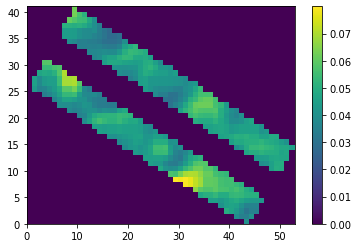

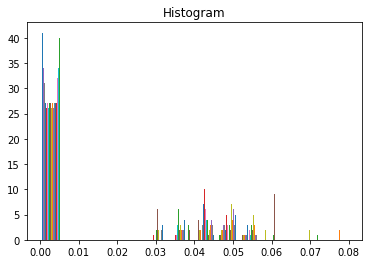

Opening band B3
(41, 53)


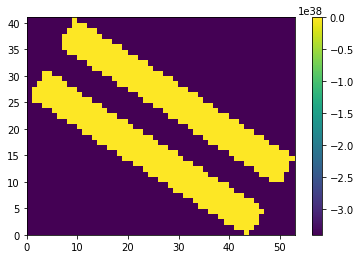

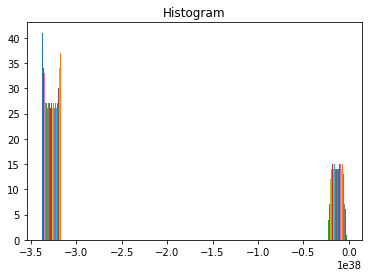

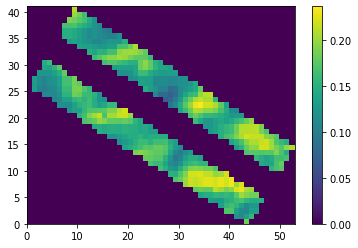

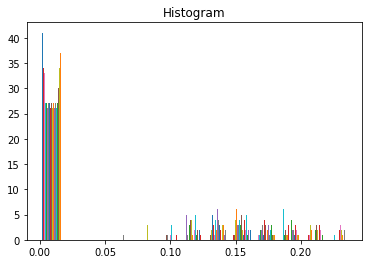

Opening band B4
(41, 53)


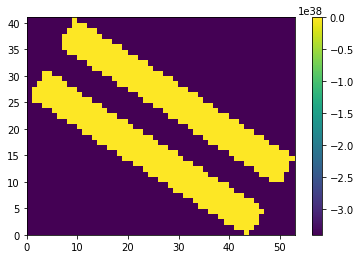

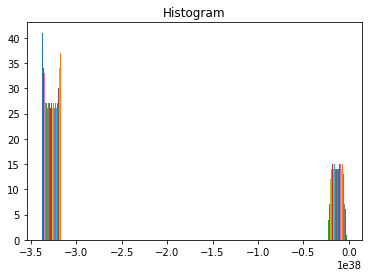

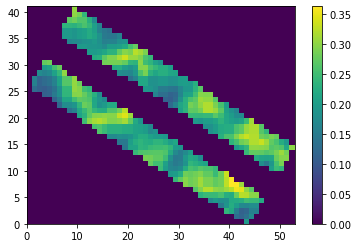

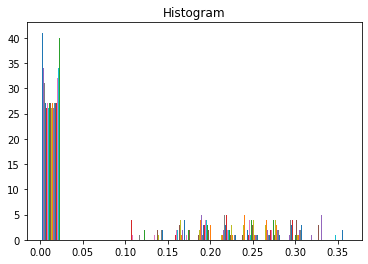

In [10]:
def open_with_rasterio():
    for band in ['B1', 'B2', 'B3', 'B4']:
        print('Opening band', band)
        image = rasterio.open(os.path.join('data', FOLDER_SAMPLE, 
                                           SAMPLE_INSTANCE + '_' + band
                                           + '.tif'),
                             driver='GTiff')
        image = image.read(1)
        print(image.shape)
        plt.pcolormesh(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
        
        image = remove_less_than_zero(image)
        plt.pcolormesh(image)
        plt.colorbar()
        plt.show()
        plt.close()
        print_histogram(image)
        
open_with_rasterio()

## Plot de algumas imagens (b2s e bfs)

In [11]:
samples = [
    "c160418tscrfl_nfung_64",
    "c160407tscrfl_fung_53",
    "c160418tscrfl_fung_72",
    "c160407tscrfl_fung_22",
]
folders = [
    "RAW/crop_tsc_2016_b2s",
    "RAW/crop_tsc_2016_bfs"
]

(41, 53, 4)


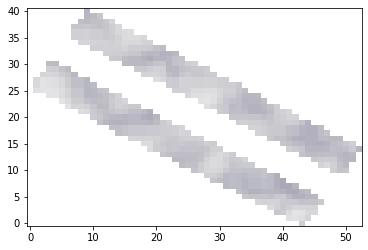

(42, 52, 4)


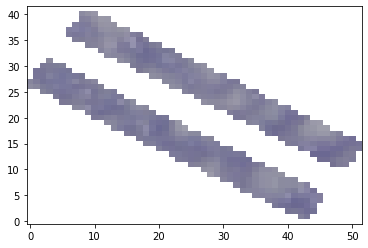

(41, 53, 4)


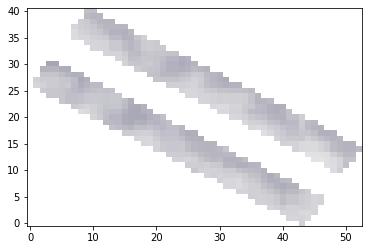

(41, 53, 4)


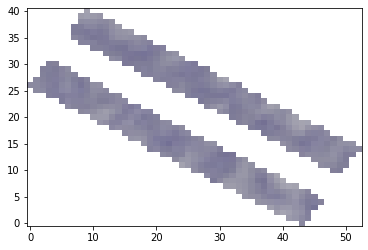

(46, 55, 4)


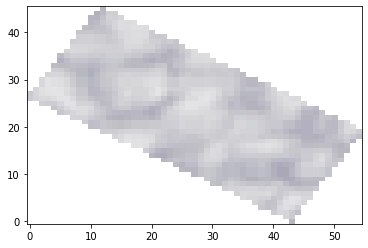

(46, 56, 4)


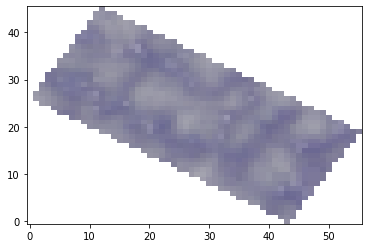

(45, 56, 4)


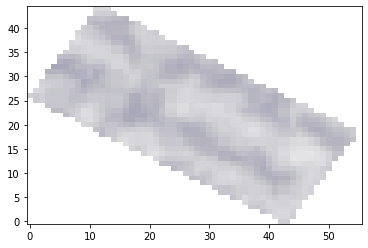

(45, 55, 4)


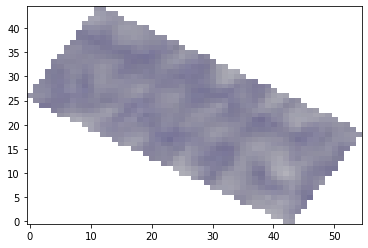

In [12]:
for folder in folders:
    i = 0
    for sample in samples:
        bands = []
        for band in ['B1', 'B2', 'B3', 'B4']:
            
            image = rasterio.open(os.path.join('data', folder, 
                                               sample + '_' + band
                                               + '.tif'),
                                 driver='GTiff')
            image = image.read(1)
            image = remove_less_than_zero(image)
            i+=1
            bands.append(np.asarray(image))
        fullim = np.stack(np.asarray(bands), axis=2)
        print(fullim.shape)
#         fullim = cv2.cvtColor(fullim, cv2.COLOR_BGR2RGB)
        plt.imshow(fullim, aspect='auto', origin='lower')
        plt.show()
        plt.close()

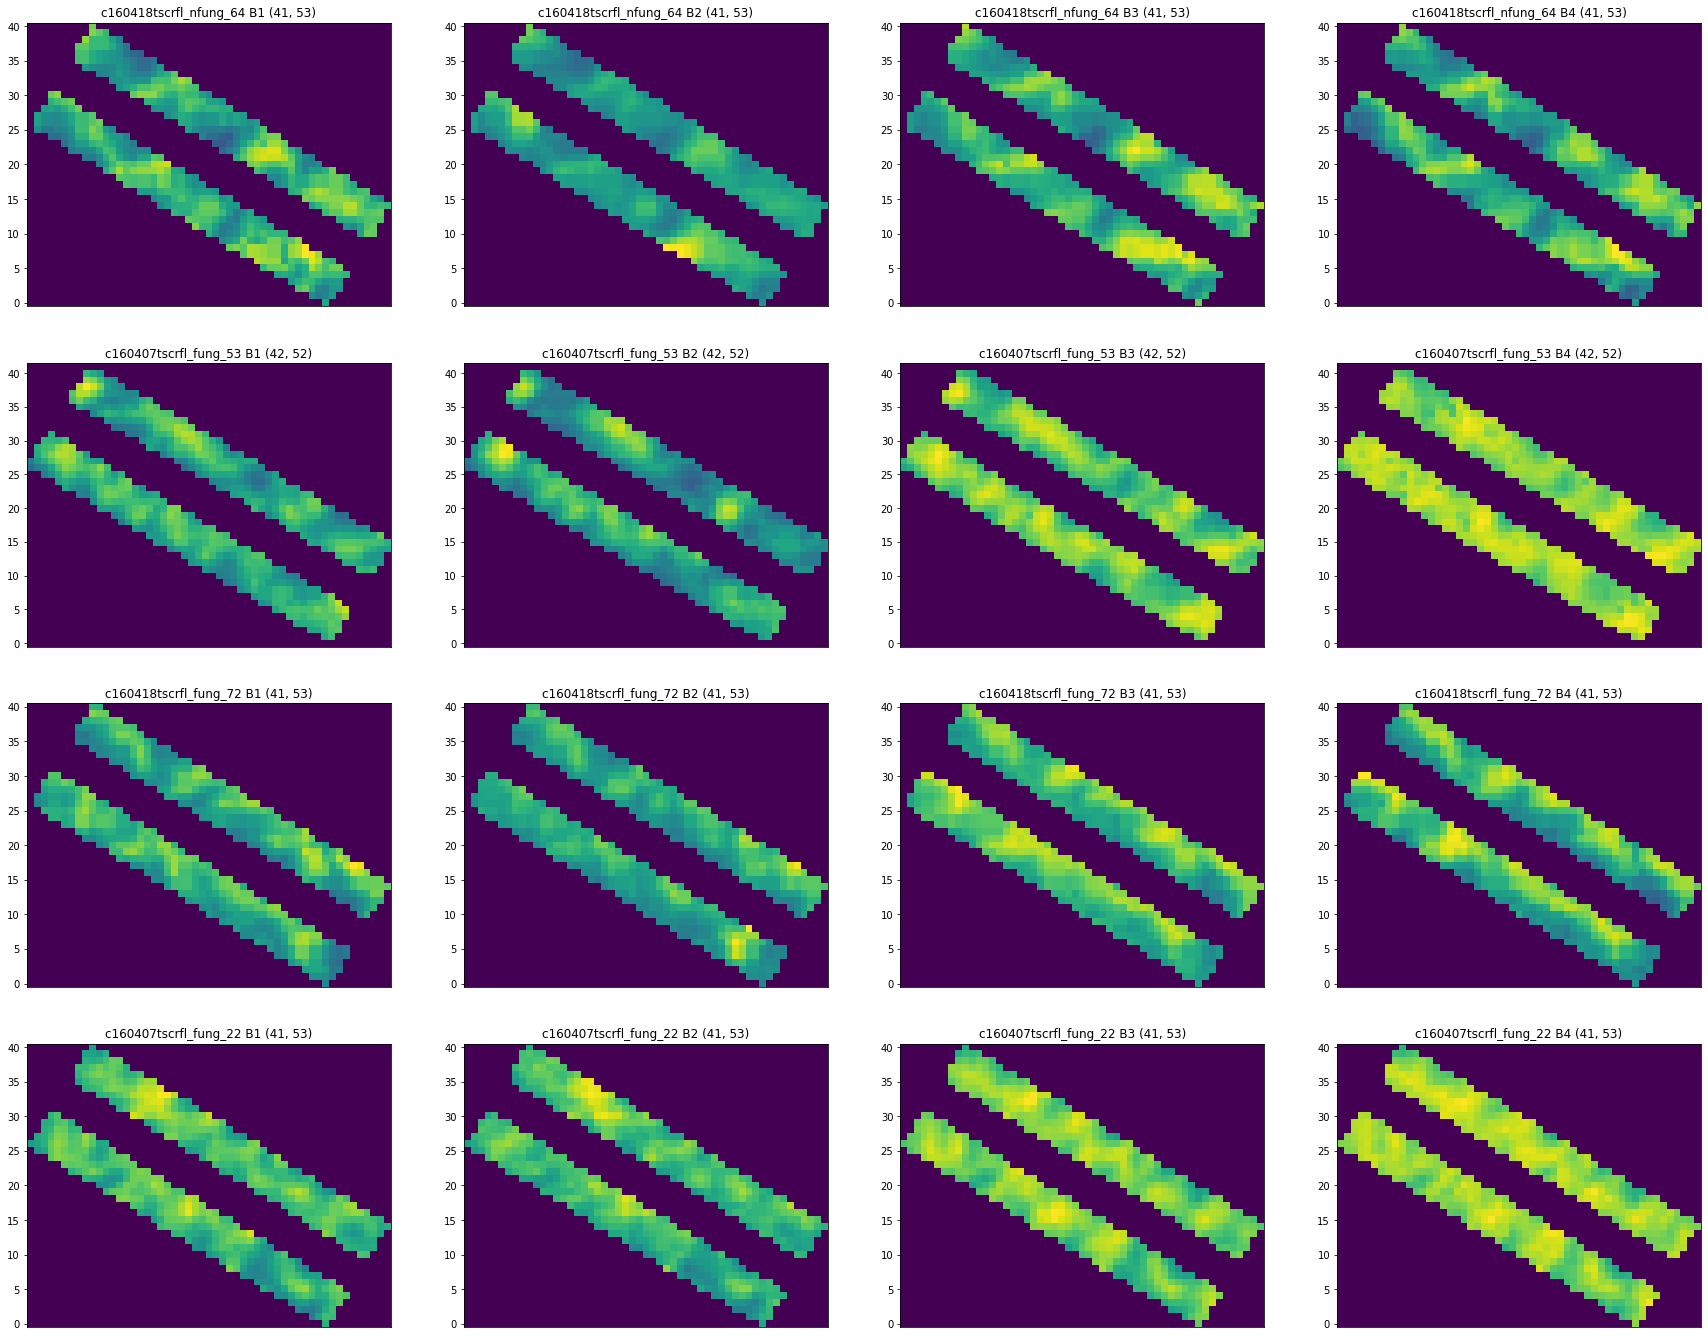

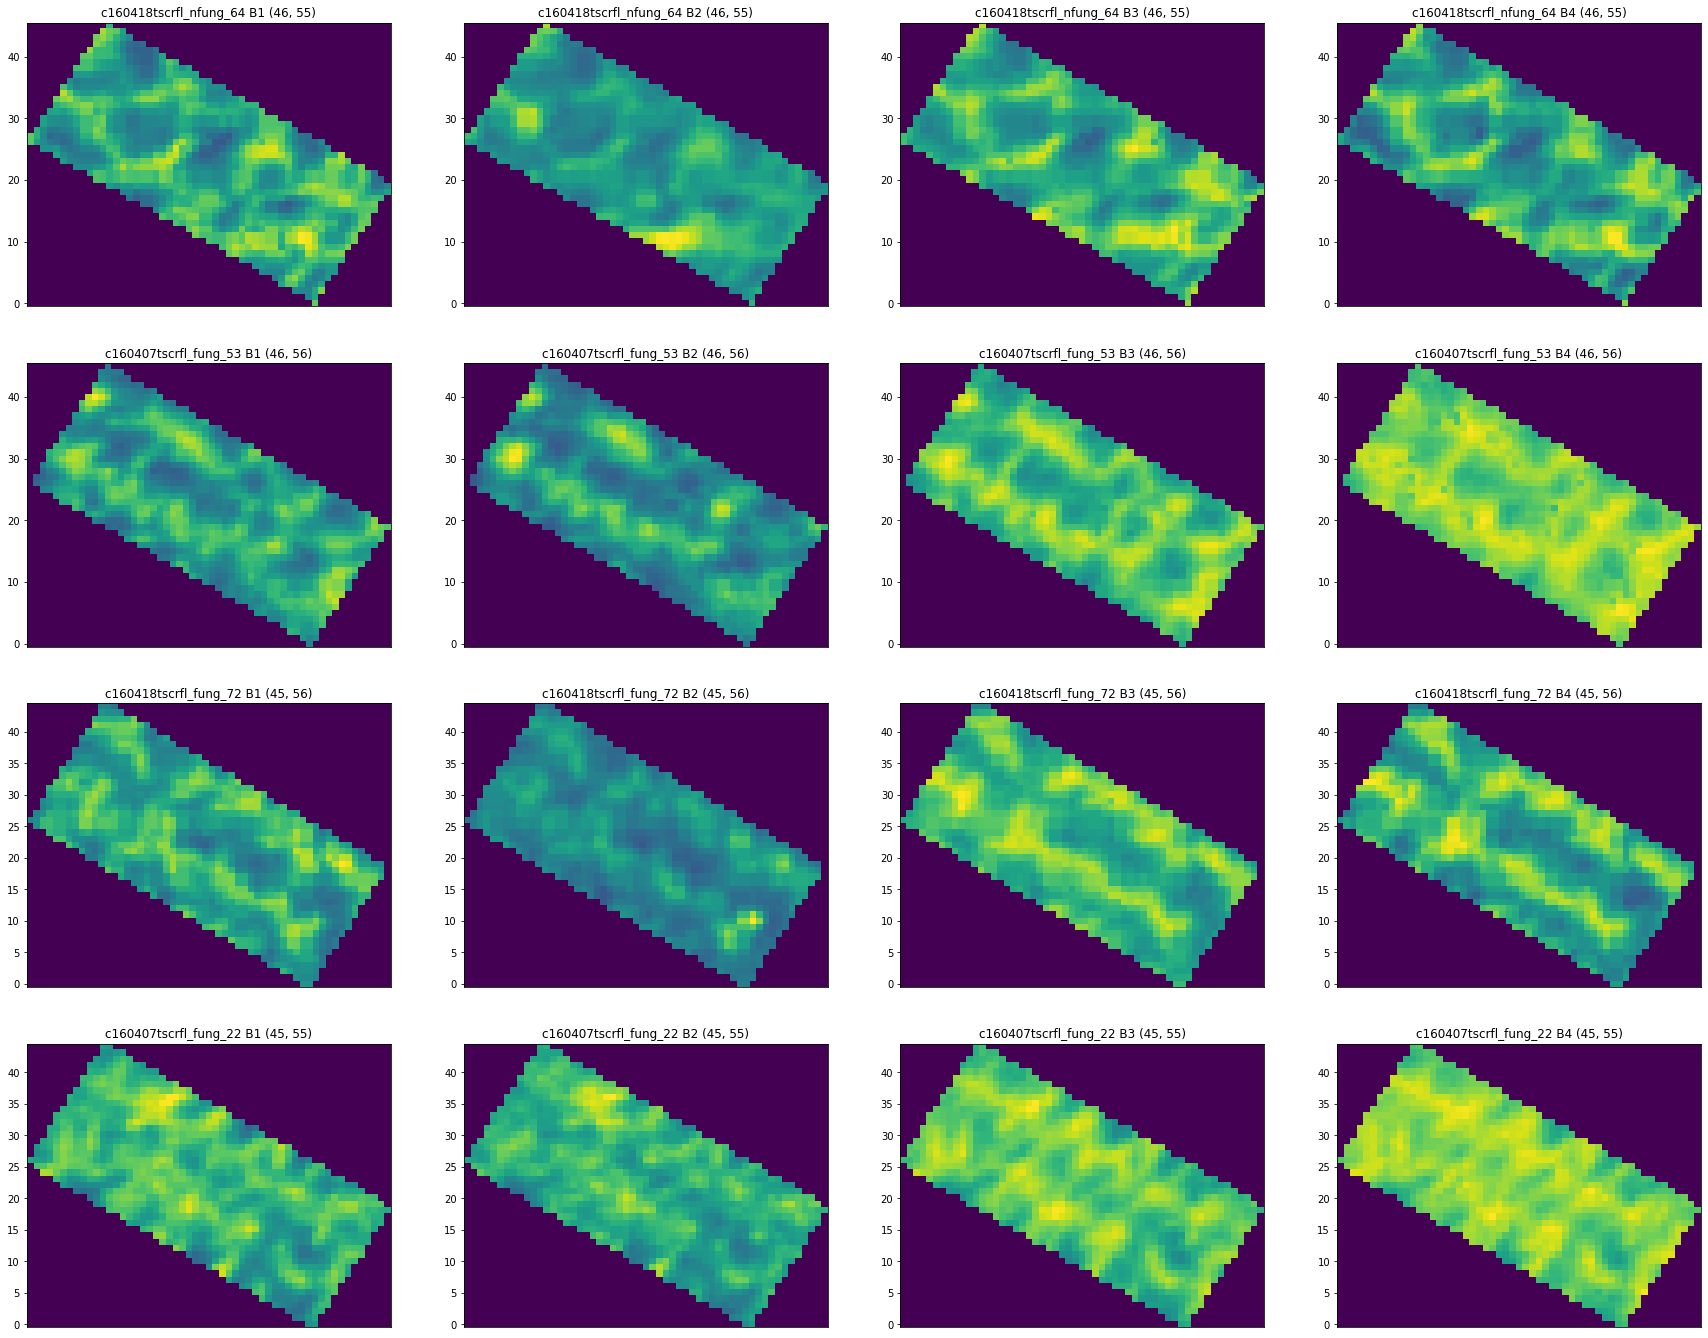

In [13]:
for folder in folders:
    fig, ax = plt.subplots(4, 4, figsize = (30, 24))
    i = 0
    for sample in samples:
        for j, band in enumerate(['B1', 'B2', 'B3', 'B4']):
            image = rasterio.open(os.path.join('data', folder, 
                                               sample + '_' + band
                                               + '.tif'),
                                 driver='GTiff')
            image = image.read(1)
#             print(sample, band, image.shape)
            image = remove_less_than_zero(image)
            ax[i//4, i%4].imshow(image, aspect='auto', origin='lower')
        #     ax[i//4, i%4].set_yticks(freqs[::40])
        #     ax[i//4, i%4].set_xticks(times[::40])
            ax[i//4, i%4].set_title(f"{sample} {band} {image.shape}")
            ax[i//4, i%4].get_xaxis().set_ticks([])
            i+=1
    fig.savefig(f"samples-{folder.split(os.sep)[-1]}", dpi=100) 